# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    units="metric"
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (C)": city_max_temp,
                          "Humidity (%)": city_humidity,
                          "Cloudiness (%)": city_clouds,
                          "Wind Speed (m/s)": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | tamanrasset
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | severo-yeniseyskiy
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | colonia
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | antsiranana
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | greymouth
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | arkhangel'sk
Processing Record 15 of Set 1 | tarko-sale
Processing Record 16 of Set 1 | olinda
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | hami
Processing Record 19 of Set 1 | chonchi
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | 

Processing Record 38 of Set 4 | murzuq
Processing Record 39 of Set 4 | portland
Processing Record 40 of Set 4 | rexburg
Processing Record 41 of Set 4 | abraham's bay
City not found. Skipping...
Processing Record 42 of Set 4 | tshikapa
Processing Record 43 of Set 4 | kimbe
Processing Record 44 of Set 4 | aasiaat
Processing Record 45 of Set 4 | san fernando
Processing Record 46 of Set 4 | callao
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | kaa-khem
Processing Record 49 of Set 4 | hotan
Processing Record 50 of Set 4 | trinidad
Processing Record 1 of Set 5 | dul'durga
Processing Record 2 of Set 5 | hilo
Processing Record 3 of Set 5 | ulsteinvik
Processing Record 4 of Set 5 | quepos
Processing Record 5 of Set 5 | kamaishi
Processing Record 6 of Set 5 | frolovo
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | bilibino
Processing Record 9 of Set 5 | ribeira grande
Processing Record 10 of Set 5 | prince rupert
Processing Record 11 of Set 5

Processing Record 29 of Set 8 | el calafate
Processing Record 30 of Set 8 | san andres
Processing Record 31 of Set 8 | terrace
Processing Record 32 of Set 8 | suntar
Processing Record 33 of Set 8 | horta
Processing Record 34 of Set 8 | orkney
Processing Record 35 of Set 8 | moapa valley
Processing Record 36 of Set 8 | brioude
Processing Record 37 of Set 8 | westport
Processing Record 38 of Set 8 | penzance
Processing Record 39 of Set 8 | papao
Processing Record 40 of Set 8 | akjoujt
Processing Record 41 of Set 8 | klaksvik
Processing Record 42 of Set 8 | jawhar
Processing Record 43 of Set 8 | ta`u
Processing Record 44 of Set 8 | trairi
Processing Record 45 of Set 8 | quellon
Processing Record 46 of Set 8 | bel ombre
Processing Record 47 of Set 8 | el bauga
Processing Record 48 of Set 8 | wynyard
Processing Record 49 of Set 8 | gijang
Processing Record 50 of Set 8 | blagodarnyy
Processing Record 1 of Set 9 | nova sintra
Processing Record 2 of Set 9 | aldan
Processing Record 3 of Set 9 |

Processing Record 18 of Set 12 | yumaguzino
Processing Record 19 of Set 12 | kurchatov
Processing Record 20 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 21 of Set 12 | boguchany
Processing Record 22 of Set 12 | plettenberg bay
Processing Record 23 of Set 12 | rong'an
Processing Record 24 of Set 12 | ilha de mocambique
Processing Record 25 of Set 12 | port isabel
Processing Record 26 of Set 12 | fortaleza
Processing Record 27 of Set 12 | hadibu
Processing Record 28 of Set 12 | santiago de cao
Processing Record 29 of Set 12 | san lawrenz
Processing Record 30 of Set 12 | libenge
Processing Record 31 of Set 12 | cabedelo
Processing Record 32 of Set 12 | bogale
Processing Record 33 of Set 12 | pasuquin
Processing Record 34 of Set 12 | cadale
Processing Record 35 of Set 12 | selfoss
Processing Record 36 of Set 12 | diebougou
Processing Record 37 of Set 12 | pisco
Processing Record 38 of Set 12 | copiapo
Processing Record 39 of Set 12 | santyoku
Processing Record 40 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                580
Lat                 580
Lng                 580
Max Temp (C)        580
Humidity (%)        580
Cloudiness (%)      580
Wind Speed (m/s)    580
Country             580
Date                580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
0,bredasdorp,-34.5322,20.0403,17.39,71,5,2.24,ZA,1702324887
1,wailua homesteads,22.0669,-159.3780,25.48,85,75,3.09,US,1702324887
2,tamanrasset,22.7850,5.5228,16.95,17,0,3.60,DZ,1702324888
3,new norfolk,-42.7826,147.0587,10.95,80,92,0.72,AU,1702324888
4,severo-yeniseyskiy,60.3725,93.0408,-40.24,100,84,0.45,RU,1702324888


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,17.39,71,5,2.24,ZA,1702324887
1,wailua homesteads,22.0669,-159.3780,25.48,85,75,3.09,US,1702324887
2,tamanrasset,22.7850,5.5228,16.95,17,0,3.60,DZ,1702324888
3,new norfolk,-42.7826,147.0587,10.95,80,92,0.72,AU,1702324888
4,severo-yeniseyskiy,60.3725,93.0408,-40.24,100,84,0.45,RU,1702324888


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [14]:
today = time.strftime("%Y/%m/%d")
today

'2023/12/11'

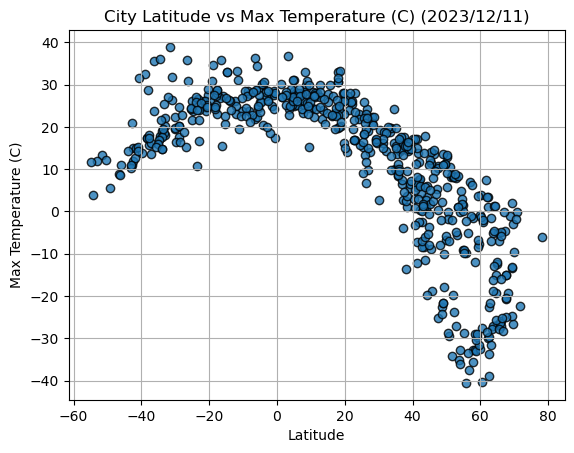

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (C)"], edgecolors="black", alpha =0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature (C) ({today})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

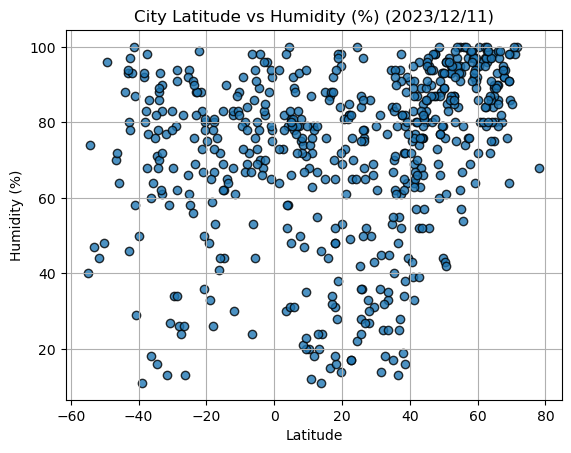

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity (%)"], edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title (f"City Latitude vs Humidity (%) ({today})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

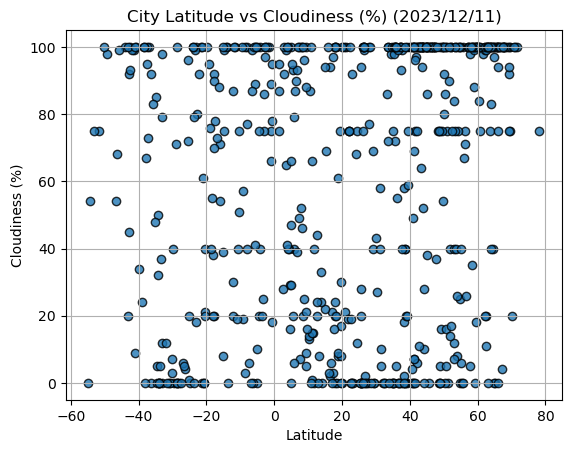

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness (%)"], edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness (%) ({today})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

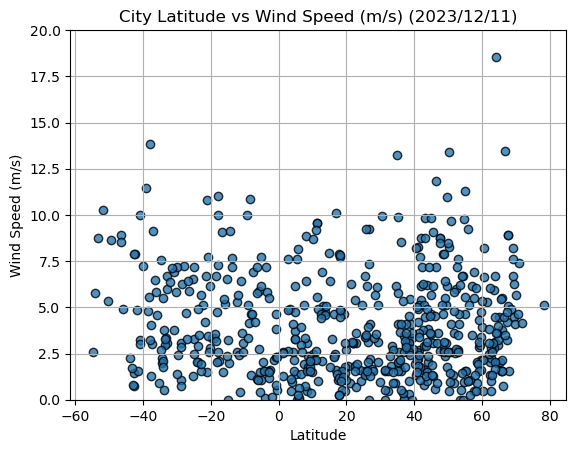

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed (m/s)"], edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed (m/s) ({today})")
plt.grid(True)
plt.ylim(0, 20)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=13, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,25.48,85,75,3.09,US,1702324887
2,tamanrasset,22.7850,5.5228,16.95,17,0,3.60,DZ,1702324888
4,severo-yeniseyskiy,60.3725,93.0408,-40.24,100,84,0.45,RU,1702324888
6,colonia,50.9333,6.9500,10.49,85,75,4.12,DE,1702324744
7,longyearbyen,78.2186,15.6401,-6.09,68,75,5.14,SJ,1702324889


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,17.39,71,5,2.24,ZA,1702324887
3,new norfolk,-42.7826,147.0587,10.95,80,92,0.72,AU,1702324888
5,port-aux-francais,-49.3500,70.2167,5.47,96,98,8.67,TF,1702324889
8,antsiranana,-12.2787,49.2917,26.13,82,30,5.31,MG,1702324889
9,grytviken,-54.2811,-36.5092,3.96,74,54,5.78,GS,1702324889


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8304542234980588


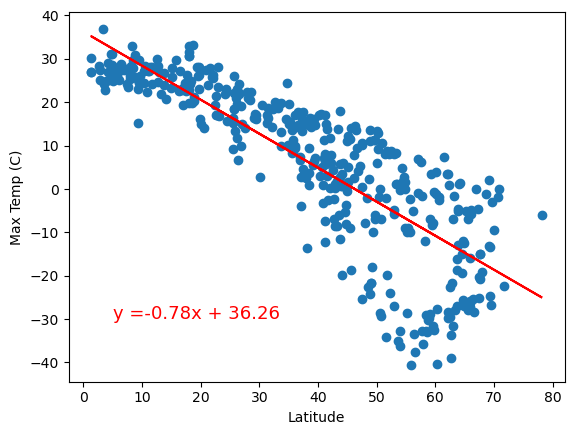

In [22]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp (C)"], (5,-30))

The r-value is: 0.5975013777807714


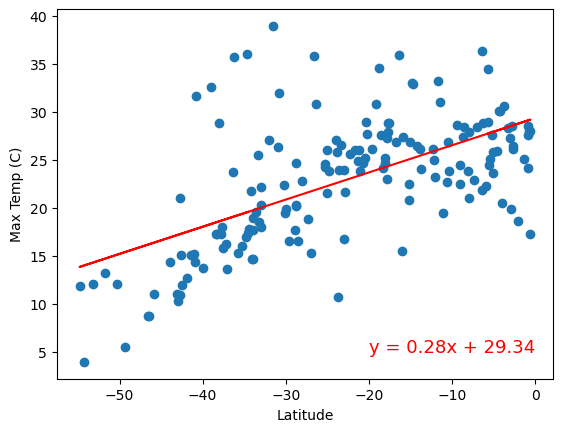

In [23]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp (C)"], (-20,5))

**Discussion about the linear relationship:** 
The max temperature (C) appears show a strong negative linear relationship with latitudes in the northern hemisphere, with an r-value of -0.830 for the linear best-fit regression line. This would indicate that the further away from the equator (0 Latitude) a point is the lower the temperature would be.

The max temperature (C) appears show a positive linear relationship with latitudes in the southern hemisphere, with an r-value of 0.598 for the linear best-fit regression line. This indicates that the temperature would rise the close the points get to the equator (0 Latitude).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.43058168639311883


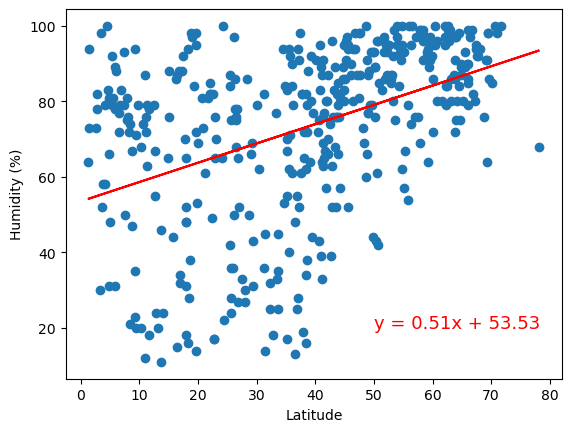

In [31]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity (%)"], (50,20))

The r-value is: 0.14227207897096078


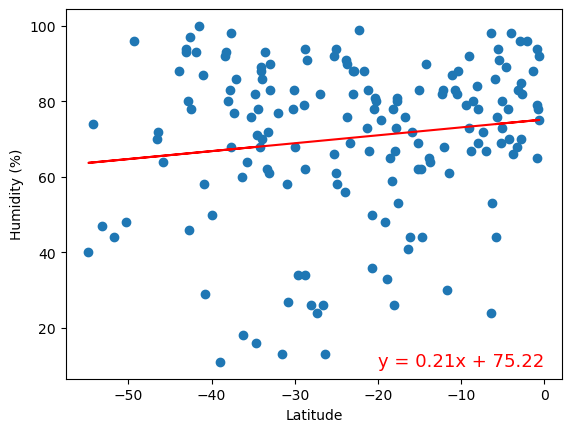

In [32]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity (%)"], (-20,10))

**Discussion about the linear relationship:** 

The relationship between humidity (%) and latitude in the northern hemisphere seems to indicate that there is an increase in cloudiness as the latitude increases. This indicates a positive linear relationsip with the r-value being 0.431.

The data seems to show a slight positive relationship between the humidity and latitude for the southern hemisphere, with an r-value of 0.142. This however isn't enough to indicate a direct linear relationship between the two variables.



### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.27258802220231176


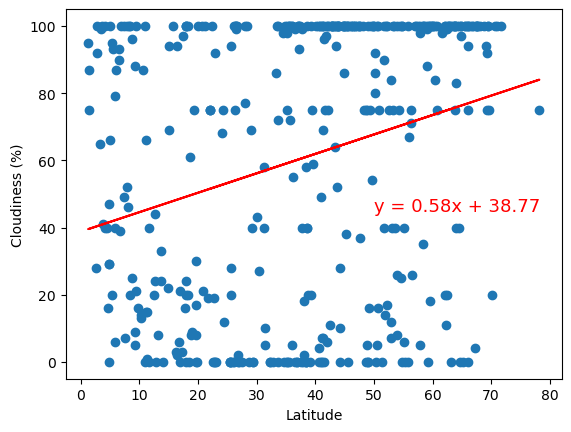

In [30]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness (%)"], (50,45))

The r-value is: 0.08584807546354756


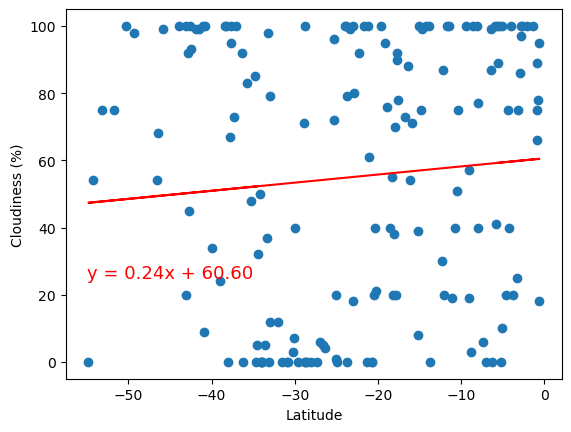

In [27]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness (%)"], (-55,25))

**Discussion about the linear relationship:** 

The data seems to show no relationship between the cloudiness (%) and latitude for the southern hemisphere, with the r-value being 0.086. Similarly for the northern hemisphere the r-value is 0.0272.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13970232333249558


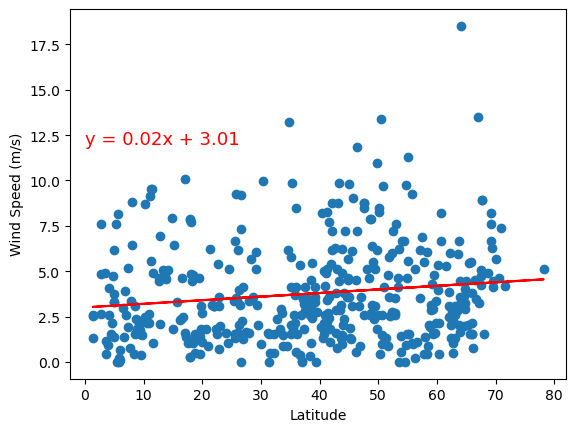

In [28]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed (m/s)"], (0,12))

The r-value is: -0.2160240370865653


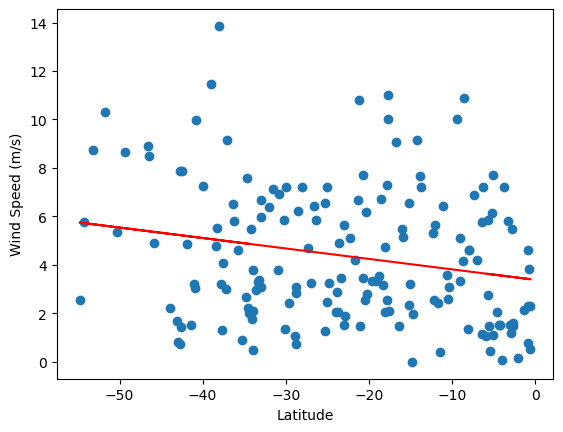

In [29]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed (m/s)"], (-20,15))

**Discussion about the linear relationship:** 

There appears to be no relationship between wind speed (m/s) and latitude in both the northern hemisphere and the southern hemisphere, with the r-value being 0.14 and -0.216 respectively.The northern hemisphere's relationship with the wind speed is  positive but the correlationship is very minimal. The reverse is true for the southern hemisphere with the relationship between the variables being slightly negative.

